[ 0.92424741  0.0545434 ]
[-0.36017485  0.07913928 -0.85833855 -0.35674359]
[-0.65756082 -0.72829212  0.18036716  0.06835238]
            0         1          species
0   -1.022115  0.340069   Iris-virginica
1   -0.710454  1.547839   Iris-virginica
2   -1.194489  0.471540   Iris-virginica
3   -0.510135  1.068548  Iris-versicolor
4    0.043297  0.473615  Iris-versicolor
5    1.086835 -1.570973      Iris-setosa
6   -1.097017  0.396400   Iris-virginica
7    1.355646  0.122816      Iris-setosa
8   -0.220348  0.098185  Iris-versicolor
9   -0.165727  0.509063  Iris-versicolor
10  -0.770255 -1.063081  Iris-versicolor
11   1.267629 -2.469100      Iris-setosa
12   1.297934 -0.279630      Iris-setosa
13  -1.729525 -1.144431   Iris-virginica
14  -0.745361  1.138893   Iris-virginica
15  -0.667448  0.328409   Iris-virginica
16   1.259271 -0.391547      Iris-setosa
17   0.307841  2.019618  Iris-versicolor
18   1.283063  0.175076      Iris-setosa
19  -0.362064 -0.074361  Iris-versicolor
20  -1.089415

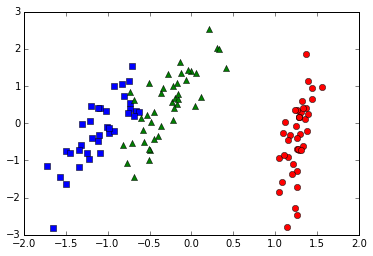

0.966666666667


In [7]:
import pandas
from sklearn import cross_validation as cv
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA #new one!


iris_data = pandas.read_csv('irisData.csv')

predictors = ["sepal length","sepal width","petal length","petal width"]

(train, test) = cv.train_test_split(iris_data, test_size = 0.2)

#whiten = True is important for uncorrelated
#attributes, and is False by default
pca = PCA(n_components=2, whiten=True)
pca.fit(train[predictors])
transformed_train_data = pca.transform(train[predictors])
transformed_test_data = pca.transform(test[predictors])
#this is the variance/importance of each component
print pca.explained_variance_ratio_
print pca.components_[0]
print pca.components_[1]


#PCA gives it back as numpy array
tdf = pandas.DataFrame(transformed_train_data)
#next line: probably not the best way
tdf['species'] = pandas.Series(list(train['species']))
print tdf
setosa_series = tdf[ tdf['species'] == 'Iris-setosa' ]
virginica_series = tdf[ tdf['species'] == 'Iris-virginica' ]
versicolor_series = tdf[ tdf['species'] == 'Iris-versicolor']
plt.plot(setosa_series[0],setosa_series[1],'ro')
plt.plot(virginica_series[0],virginica_series[1],'bs')
plt.plot(versicolor_series[0],versicolor_series[1],'g^')
plt.show()

clf = SVC(kernel='linear')
clf.fit(transformed_train_data,train['species'])
predictions = clf.predict(transformed_test_data)
print metrics.accuracy_score(test['species'], predictions)

